### Data Preprocessing

#### 1.1 Training-Validation split

In [1]:
import os
from os import listdir
import os.path
import numpy as np
import random
import json

img_dir= r"C:\Users\Pundeer\Desktop\Data Science\Kaggle\amazon inventory reconciliation\amazon inventory\data\bin-images"
meta_dir = r"C:\Users\Pundeer\Desktop\Data Science\Kaggle\amazon inventory reconciliation\amazon inventory\data\metadata"

def get_metadata(img_dir,meta_dir):
    metadata = []
    n_images = 0
#    img_list = listdir(img_dir)
#    N = len(img_list)
    N = 10500
    for i in range(N):
        if i%1000 == 0:
            print("get_metadata: processing (%d/%d)..." % (i,N))
        jpg_path = '%s\%05d.jpg' % (img_dir,i+1)
        json_path = '%s\%05d.json' % (meta_dir,i+1)
        if os.path.isfile(jpg_path) and os.path.isfile(json_path):
            d = json.loads(open(json_path).read())
            metadata.append(d)
            n_images = n_images + 1
        else:
            metadata.append({})
    print("get_metadata: Available Images: %d" % n_images)
    return metadata,n_images

metadata, n_images = get_metadata(img_dir, meta_dir)

get_metadata: processing (0/10500)...
get_metadata: processing (1000/10500)...
get_metadata: processing (2000/10500)...
get_metadata: processing (3000/10500)...
get_metadata: processing (4000/10500)...
get_metadata: processing (5000/10500)...
get_metadata: processing (6000/10500)...
get_metadata: processing (7000/10500)...
get_metadata: processing (8000/10500)...
get_metadata: processing (9000/10500)...
get_metadata: processing (10000/10500)...
get_metadata: Available Images: 10444


In [2]:
N = len(metadata)
list_random = list(range(N))
random.shuffle(list_random)

# finding images that metadata exists
meta_avail = np.zeros(N, dtype=bool)
for i in range(N):
    meta_fname = os.path.join(meta_dir,('%05d.json' %(i+1)))
    if os.path.isfile(meta_fname):
        meta_avail[i] = True

# assign validataion set
valset = np.zeros(N, dtype=bool)

n_valset = int(round(N*0.1))
count = 0
random.shuffle(list_random)
for i in range(N):
    idx = list_random[i]
    if meta_avail[idx]:
        valset[idx] = True
        count += 1
        if count == n_valset:
            break

# writing out to textfile
random_train = []
random_val = []

for i in range(N):
    if meta_avail[i]:
        if valset[i]:
            random_val.append("%d" % (i+1))
        else:
            random_train.append("%d" % (i+1))

In [3]:
def get_quantity(idx):
    quantity = 0
    if metadata[idx]:
        quantity = metadata[idx]['EXPECTED_QUANTITY']
    return quantity

def get_moderate_list(split_file):
    train_list = []
    #with open(split_file) as f:
    for line in split_file:
        idx = int(line)-1
        quantity = get_quantity(idx)
        if quantity < 6:
            train_list.append([idx,quantity])
    return train_list 

counting_train = get_moderate_list(random_train)
counting_val = get_moderate_list(random_val)

In [4]:
counting_train[10]

[21, 5]

### 2. SVM Classifier using Blog-Log Model

In [6]:
from PIL import Image
import skimage.io
#from skimage import data, exposure
import matplotlib.pyplot as plt
import skimage.transform
from skimage import color
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from skimage import feature

6375
[7745, 5]
data array (224, 224)


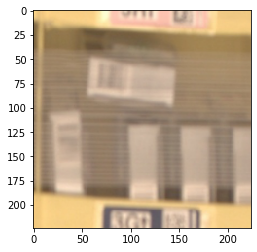

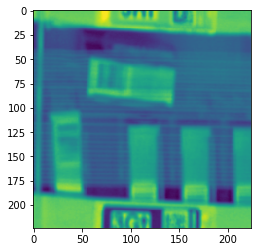

In [7]:
data_list = counting_train
print(len(data_list))

# Randomly select 5,000 images for model development
random.Random(5).shuffle(data_list)
data_list_sample = data_list[0:3000]

# Load resized image data based on the sampled data_list
print(data_list_sample[5])
img_name = '%05d.jpg' % (data_list_sample[5][0]+1)
img = os.path.join(img_dir, img_name)
a = skimage.io.imread(img)
img_resize = skimage.transform.resize(a, (224,224,3))
plt.imshow(img_resize)

data_gray = color.rgb2gray(img_resize)
print("data array", data_gray.shape)
plt.figure()
plt.imshow(data_gray)

#### Blob Laplacian of Guassian

bob log [[  0.          72.          13.88888889]
 [184.         113.          10.66666667]
 [  0.         119.          17.11111111]
 [  0.         185.          20.33333333]
 [197.          84.           4.22222222]
 [223.          31.          30.        ]
 [206.         142.           7.44444444]
 [132.         112.          10.66666667]
 [182.         166.          10.66666667]
 [ 76.         122.          17.11111111]
 [223.         223.          23.55555556]
 [217.          83.           4.22222222]
 [133.         165.          10.66666667]
 [223.         117.           4.22222222]
 [223.         192.          17.11111111]
 [198.         125.           4.22222222]
 [175.          37.          10.66666667]
 [114.          34.          10.66666667]
 [ 71.          75.          17.11111111]
 [223.         102.          10.66666667]
 [213.         117.           4.22222222]
 [184.         215.           7.44444444]]


C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


(array([ 74., 338., 663., 763., 679., 483.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

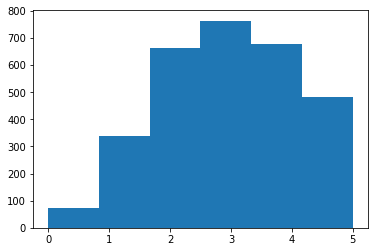

In [8]:
#Blob detection - Laplacian of Guassian (LoG)
blobs_log = feature.blob_log(data_gray, max_sigma=30, num_sigma=10, threshold=0.1)
print("bob log", blobs_log)

# Distribution of various counts in the training set
labels = np.empty((len(data_list_sample), ), dtype=np.int)
for idx,data in enumerate(data_list_sample):
    labels[idx] = data[1]

plt.hist(labels, bins = 6, density = False)

In [9]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

training = np.empty((3000, 224 * 3), dtype=np.int16)

for idx,data in enumerate(data_list_sample):
    img_name = '%05d.jpg' % (data[0]+1)
    img = os.path.join(img_dir, img_name)
    img_data = skimage.io.imread(img)
    img_data_resize = skimage.transform.resize(img_data, (224,224,3))
    image_gray = rgb2gray(img_data_resize)
    
    #blobs log  
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
        
    training_tmp = np.zeros((224, 224), dtype=np.int8)    
    for j in range(blobs_log.shape[0]):
        x = blobs_log[j, 0]
        y = blobs_log[j, 1]
        val = np.int(blobs_log[j, 2])
        
        training_tmp[int(x),int(y)] = val
    
    training_sum = np.zeros((1, 224), dtype=np.int16)
    training_max = np.zeros((1, 224), dtype=np.int16)
    training_count = np.zeros((1, 224), dtype=np.int16)
    
    for k in range(training_tmp.shape[0]):      
        sum1 = np.sum(training_tmp[k, :])
        max1 = np.max(training_tmp[k, :])
        count1 = np.sum(training_tmp[k, :] > 0)
        
        training_sum[0, k] = sum1
        training_max[0, k] = max1
        training_count[0, k] = count1
        
    training[idx, :] =  np.column_stack((training_sum,training_max, training_count)) 
    
# Saving training set to file
print(np.sum((blobs_log[:, 2])))
print(np.sum(training))

C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)


234.88888888888889
793360


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

clf = SVC()
clf.fit(training, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
from sklearn.metrics import classification_report,accuracy_score
y_pred = clf.predict(training)

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00       338
           2       0.33      0.32      0.32       663
           3       0.31      0.82      0.45       763
           4       0.59      0.26      0.36       679
           5       1.00      0.03      0.06       483

    accuracy                           0.34      3000
   macro avg       0.37      0.24      0.20      3000
weighted avg       0.44      0.34      0.28      3000



C:\Users\Pundeer\.conda\envs\friday\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
